In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [156]:
plt.style.available
plt.style.use('default')

In [302]:
raw_mobility = pd.read_csv('applemobilitytrends-2020-05-09.csv')

In [303]:
mobility = raw_mobility.melt(['region', 'transportation_type', 'geo_type', 'alternative_name'], value_name = 'value', var_name = 'date')

mobility.index = pd.to_datetime(mobility['date'])
mobility['value'] = mobility['value'].apply(lambda v: v-100)
mobility[mobility['region'] == "Georgia"]['value']

date
2020-01-13     0.00
2020-01-14     4.66
2020-01-15     5.64
2020-01-16    12.08
2020-01-17    30.73
              ...  
2020-05-05    -7.85
2020-05-06    -6.72
2020-05-07    -1.92
2020-05-08     4.33
2020-05-09     9.50
Name: value, Length: 118, dtype: float64

In [448]:
!ls ../covid-tracking-data/data/states_daily_4pm_et.csv
states = pd.read_csv("../covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates = ['date'], index_col = 'date')[::-1]
states

../covid-tracking-data/data/states_daily_4pm_et.csv


,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN
2020-01-23,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-24,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-25,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2020-01-26,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11,AZ,11380.0,138861.0,NaN,717.0,1537.0,297.0,NaN,201.0,NaN,...,1537.0,150241,150241,150241,4,6.0,9.0,12241.0,261.0,12502.0
2020-05-11,AS,0.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,105,105,105,60,0.0,0.0,22.0,0.0,22.0
2020-05-11,AR,4034.0,64996.0,NaN,61.0,480.0,NaN,NaN,11.0,98.0,...,480.0,69030,69030,69030,5,6.0,9.0,3215.0,287.0,3502.0


In [378]:
ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum()

,positiveIncrease,totalTestResultsIncrease
date,,
2020-03-08,5.0,5.0
2020-03-15,92.0,92.0
2020-03-22,501.0,3921.0
2020-03-29,2051.0,8544.0
2020-04-05,3996.0,15268.0
2020-04-12,5805.0,26621.0
2020-04-19,5849.0,25480.0
2020-04-26,5100.0,43290.0
2020-05-03,5201.0,51873.0


In [459]:
states[states['state'] == 'PA'][['death']]

,death
date,
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN
...,...
2020-05-07,3416.0
2020-05-08,3616.0
2020-05-09,3688.0


In [461]:
pa_weekly = states[states['state'] == 'PA'][['deathIncrease']][:-1].groupby(pd.Grouper(freq='W-SAT')).sum()
pa_weekly

,deathIncrease
date,
2020-03-07,0.0
2020-03-14,0.0
2020-03-21,2.0
2020-03-28,32.0
2020-04-04,102.0
2020-04-11,358.0
2020-04-18,342.0
2020-04-25,701.0
2020-05-02,881.0


In [505]:
pa_weekly[-4:-1].mean()

deathIncrease    950.666667
dtype: float64

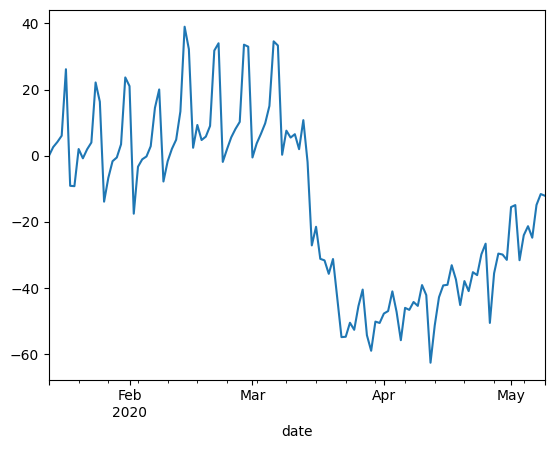

In [473]:
mobility[mobility['region'] == "Pennsylvania"]['value'].plot()

In [553]:
print(states[states['state'] == 'PA'][['death']].loc[pd.to_datetime('2020-05-09')])
states[states['state'] == 'PA'][['death']].loc[pd.to_datetime('2020-05-09')] + 950 * 5

death    3688.0
Name: 2020-05-09 00:00:00, dtype: float64


death    8438.0
Name: 2020-05-09 00:00:00, dtype: float64

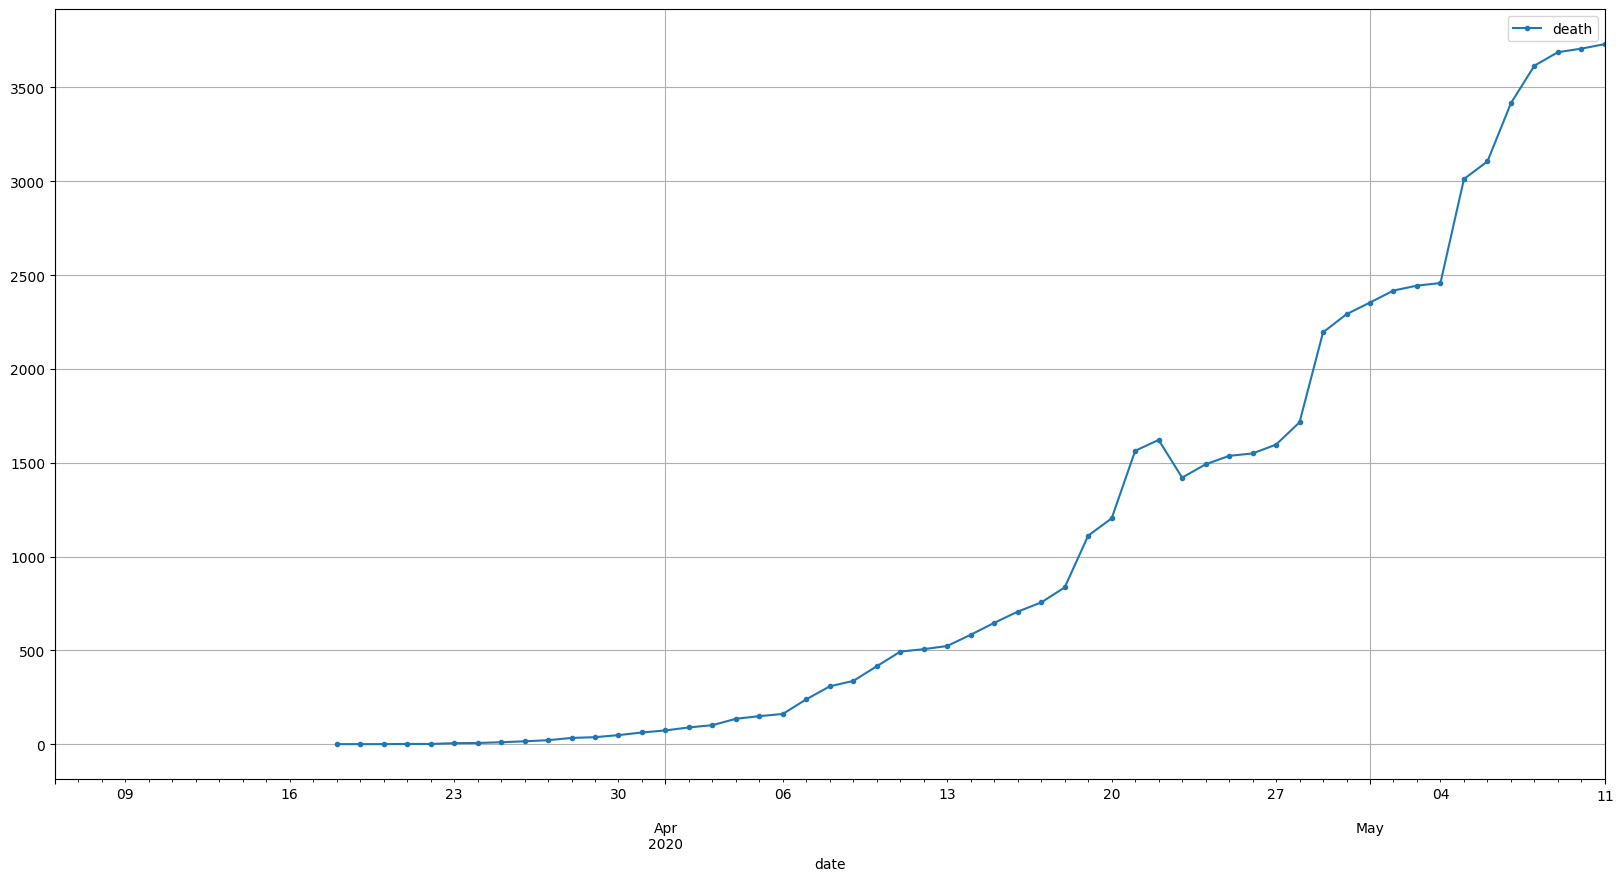

In [551]:
states[states['state'] == 'PA'][['death']].plot(
    figsize=(20,10),
    style=['.-'],
    grid=True)

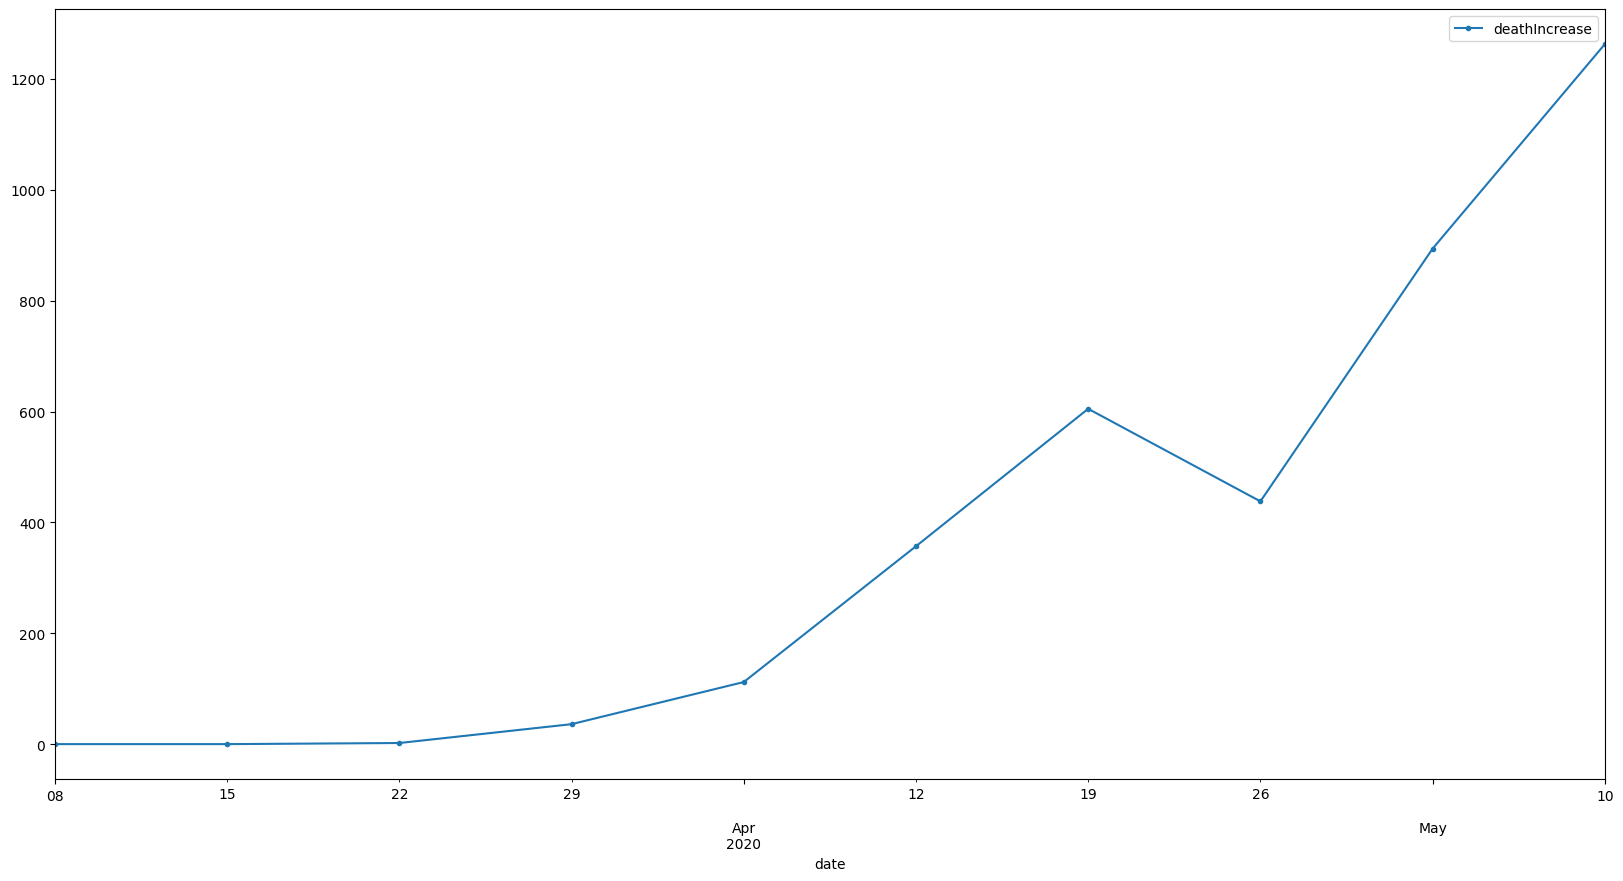

In [456]:
states[states['state'] == 'PA'][['deathIncrease']][:-1].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    figsize=(20,10),
    style=['.-'])

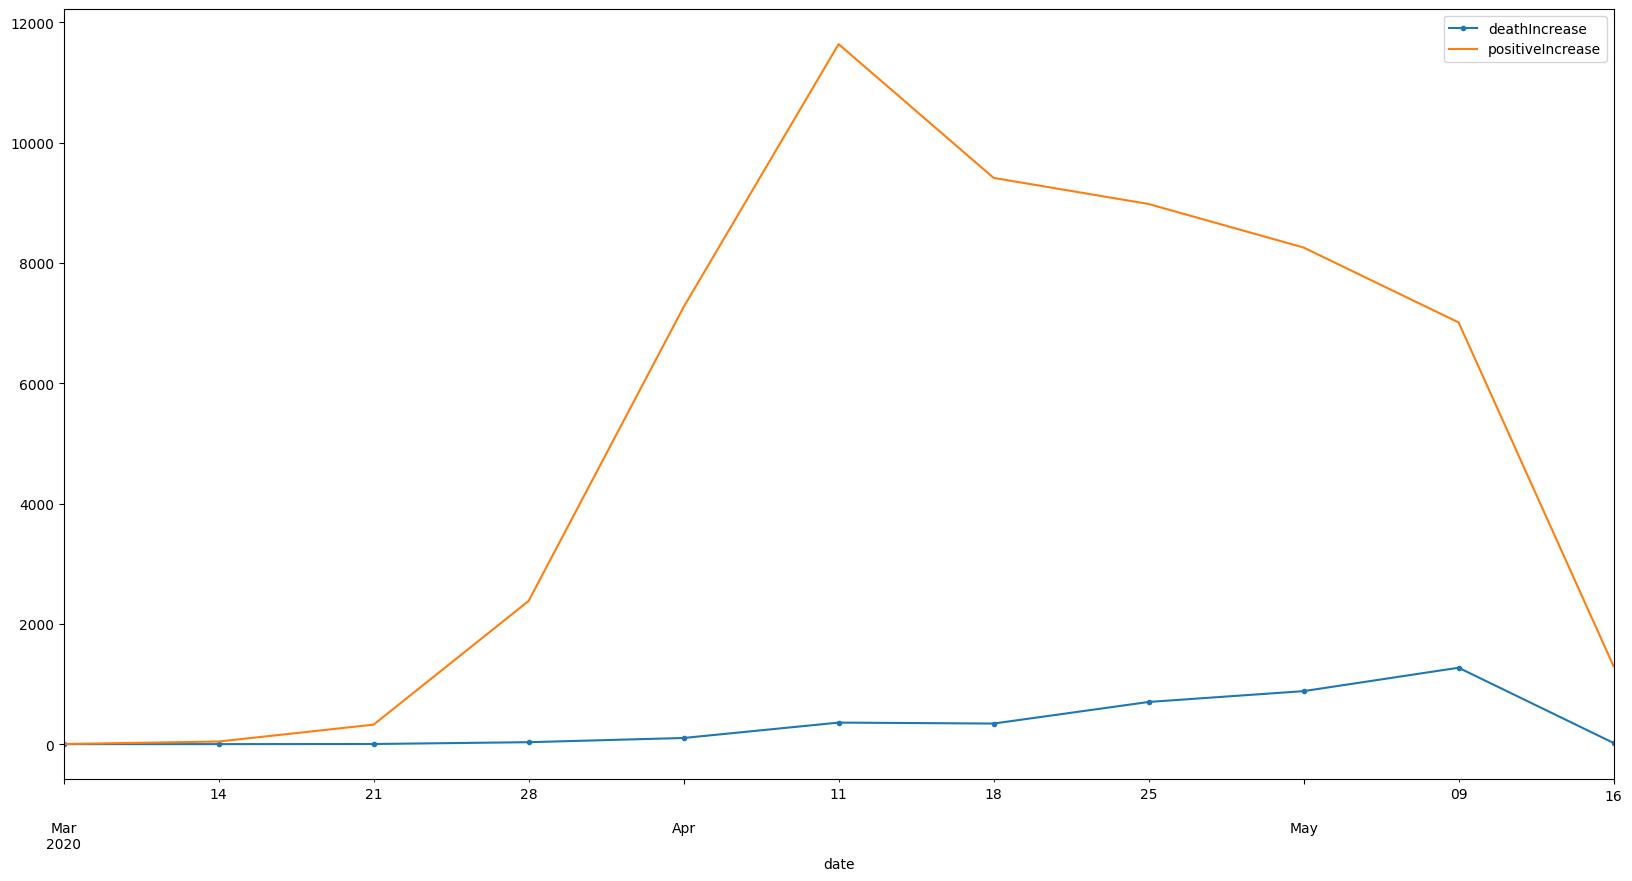

In [554]:
states[states['state'] == 'PA'][['deathIncrease','positiveIncrease']][:-1].groupby(pd.Grouper(freq='W-SAT')).sum().plot(
    figsize=(20,10),
    style=['.-'])

In [498]:
states[states['state'] == 'PA']['positiveIncrease'].groupby(pd.Grouper(freq='W-SAT')).sum()[:-1]

date
2020-03-07        2.0
2020-03-14       43.0
2020-03-21      324.0
2020-03-28     2380.0
2020-04-04     7266.0
2020-04-11    11638.0
2020-04-18     9414.0
2020-04-25     8980.0
2020-05-02     8256.0
2020-05-09     7011.0
Freq: W-SAT, Name: positiveIncrease, dtype: float64

In [492]:
states[states['state'] == 'PA'][['positive']].loc[pd.to_datetime('2020-05-09')]

positive    55316.0
Name: 2020-05-09 00:00:00, dtype: float64

In [550]:
((55316 + (8000*5)) * .055,(55316 + (8000*5)) * .6)

#81785/1385834

(5242.38, 57189.6)

In [543]:
55316 + (8000*5)

95316

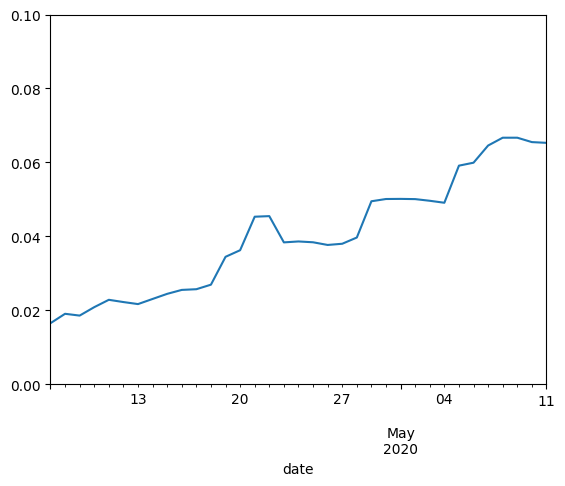

In [527]:
pa = states[states['state'] == 'PA']

(pa['death']/pa['positive'])[-35:].plot(ylim=(0,0.1))

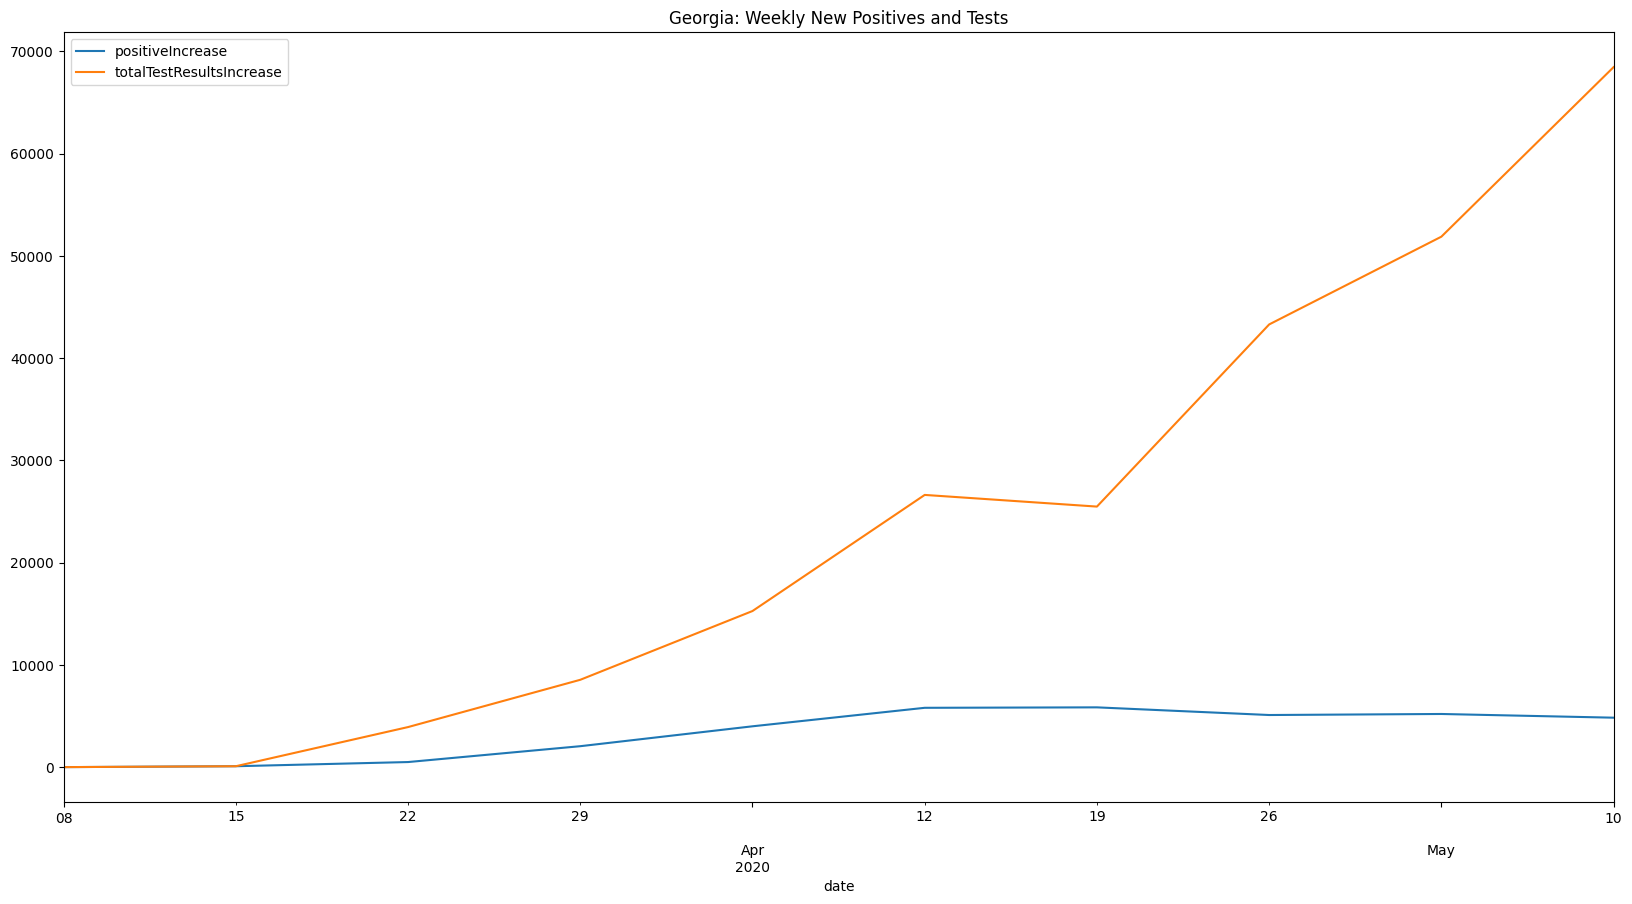

In [379]:
ga_tests = states[states['state'] == 'GA'][['positiveIncrease', 'totalTestResultsIncrease']]
ga_tests.groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10), title="Georgia: Weekly New Positives and Tests")

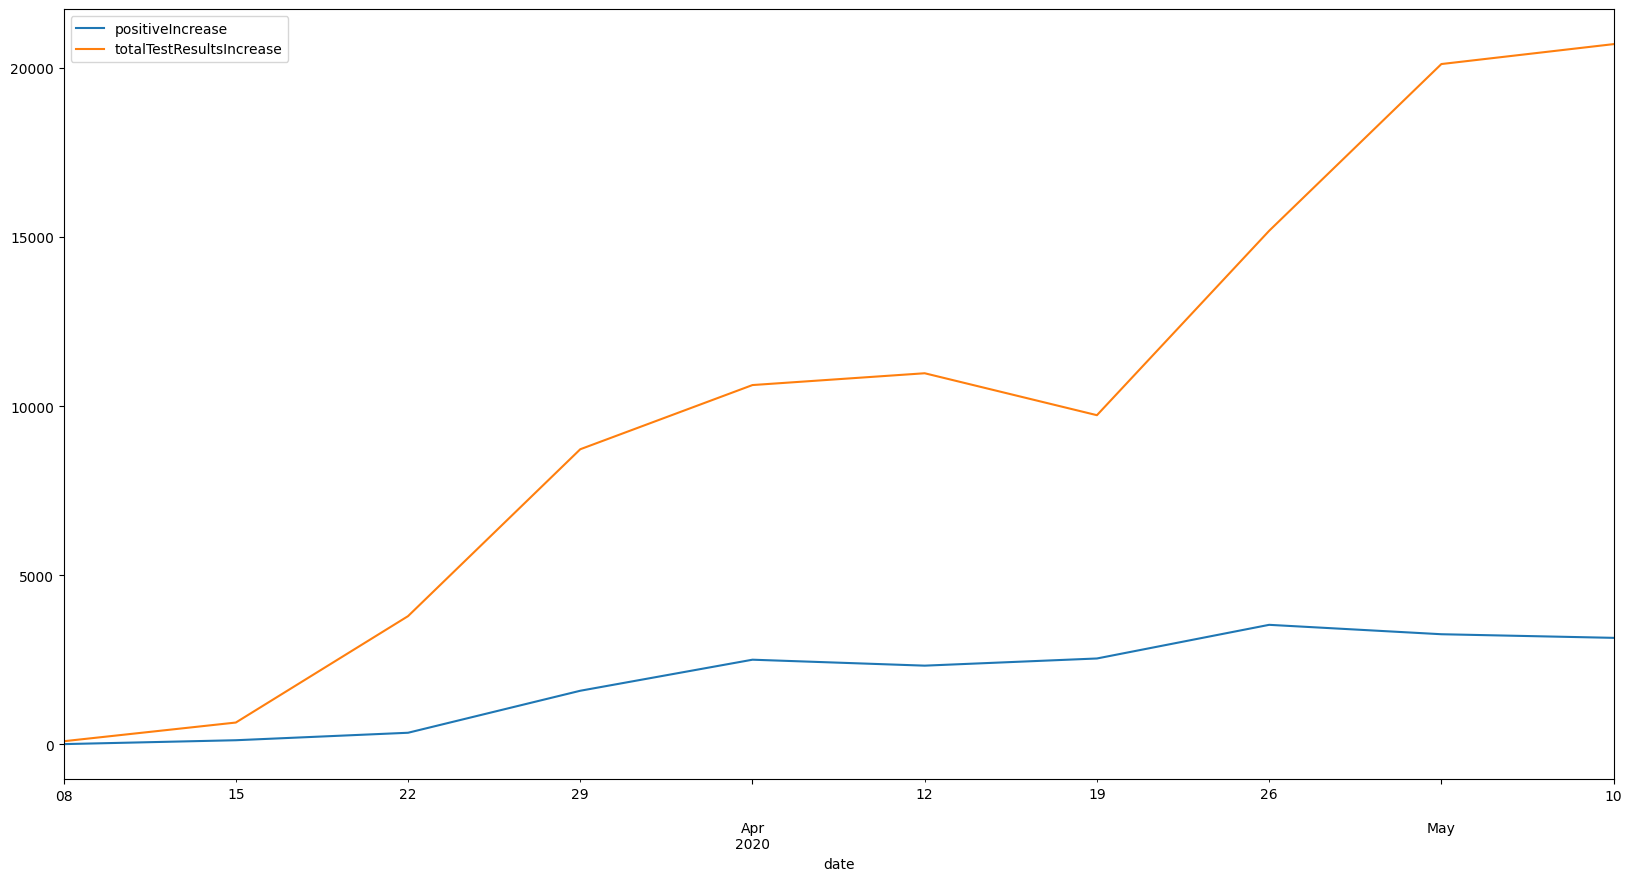

In [346]:
states[states['state'] == 'CO'][['positiveIncrease', 'totalTestResultsIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum().plot(figsize=(20,10))

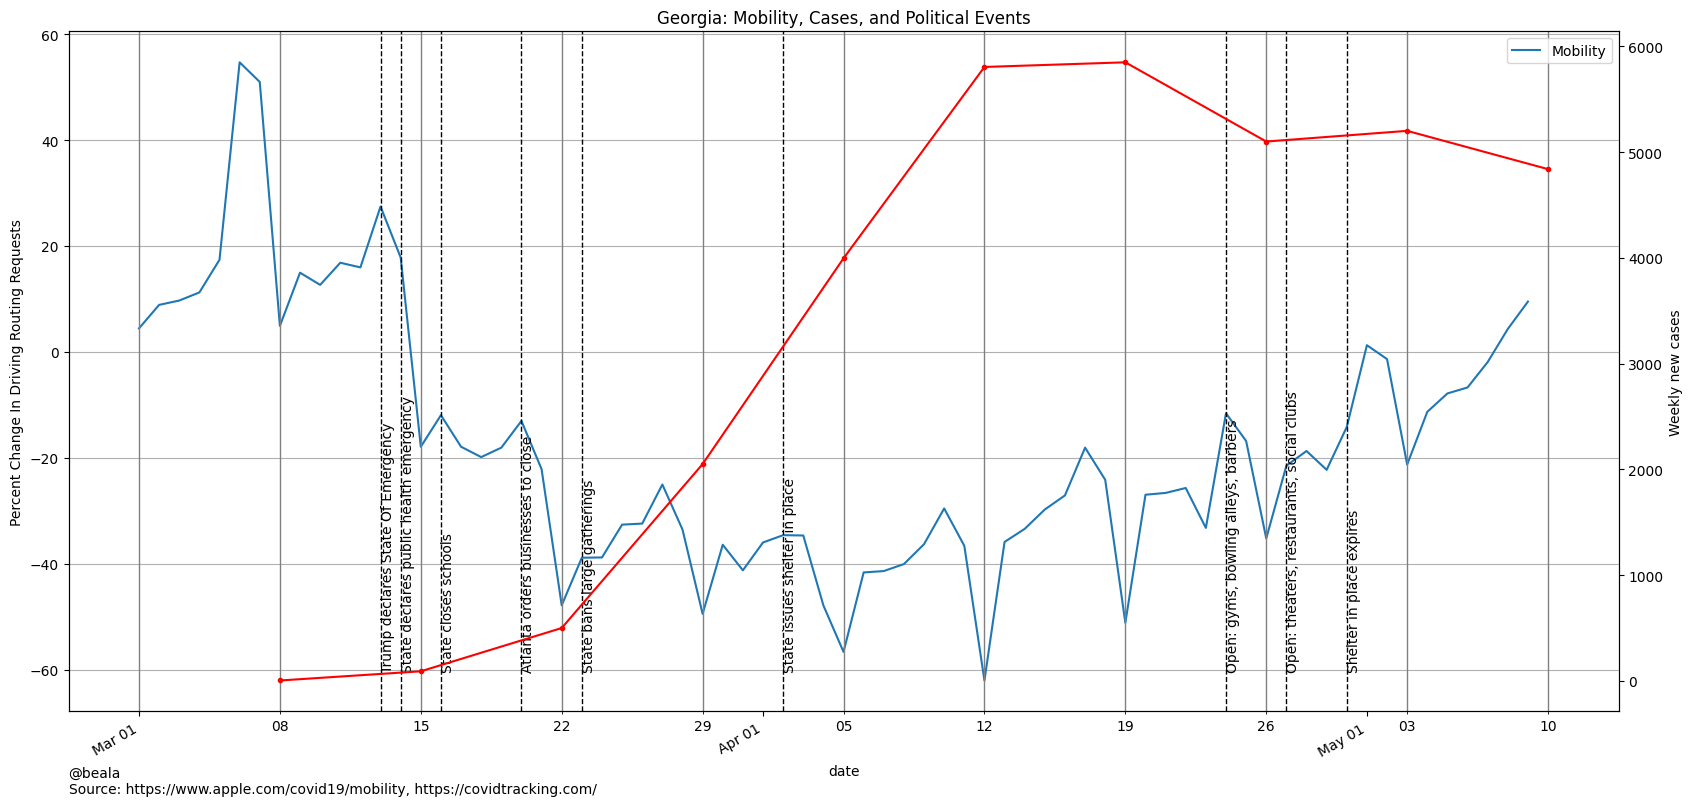

In [374]:
ga = mobility[(mobility['region'] == "Georgia") & (mobility.index >= pd.to_datetime('2020-03-01'))]['value'].copy()
ax = ga.plot(
        x_compat=True,
        figsize = (20,10),
        title = 'Georgia: Mobility, Cases, and Political Events',
        label = "Mobility")

ax.set_xlabel("Date")
ax.set_ylabel("Percent Change In Driving Routing Requests")
ax.xaxis.set_major_locator(mdates.DayLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

ax2 = ga_tests['positiveIncrease'].groupby(pd.Grouper(freq='W-SUN')).sum().plot(
    figsize=(20,10),
    color="red",
    style='.-',
    x_compat=True,
    secondary_y=True,
    label="Weekly new cases")
ax2.set_ylabel("Weekly new cases")

ax.grid(True, which='both', axis='y')
# Draw the darn grid lines myself by matplotlib is a dork
for xmin in mdates.WeekdayLocator(byweekday=mdates.SU).tick_values(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-05-10')):
  ax.axvline(x=xmin, color='grey', linewidth=1)

def event(date, label):
    ax.axvline(x=pd.to_datetime(date), color='black', linestyle='--', linewidth='1')
    ax.text(pd.to_datetime(date) - pd.to_timedelta('0 day'), -60, label, rotation=90, color='black')

event('2020-03-13', 'Trump declares State Of Emergency')
event('2020-03-14', 'State declares public health emergency')
event('2020-03-16', 'State closes schools')
event('2020-03-20', 'Atlanta orders businesses to close')
event('2020-03-23', 'State bans large gatherings')
event('2020-04-02', 'State issues shelter in place')
event('2020-04-24', 'Open: gyms, bowling alleys, barbers')
event('2020-04-27', 'Open: theaters, restaurants, social clubs')
event('2020-04-30', 'Shelter in place expires')

ax.text(
    -0.00,
    -0.12,
    "@beala\nSource: https://www.apple.com/covid19/mobility, https://covidtracking.com/",
    transform=ax.transAxes
)
ax.legend()
plt.savefig("ga_mobility.png")
plt.show()

In [326]:
ga_p = ga_positives.groupby(pd.Grouper(freq='W-SUN')).sum()

ga

date
2020-03-01     4.44
2020-03-02     8.88
2020-03-03     9.70
2020-03-04    11.23
2020-03-05    17.40
              ...  
2020-05-05    -7.85
2020-05-06    -6.72
2020-05-07    -1.92
2020-05-08     4.33
2020-05-09     9.50
Name: value, Length: 70, dtype: float64

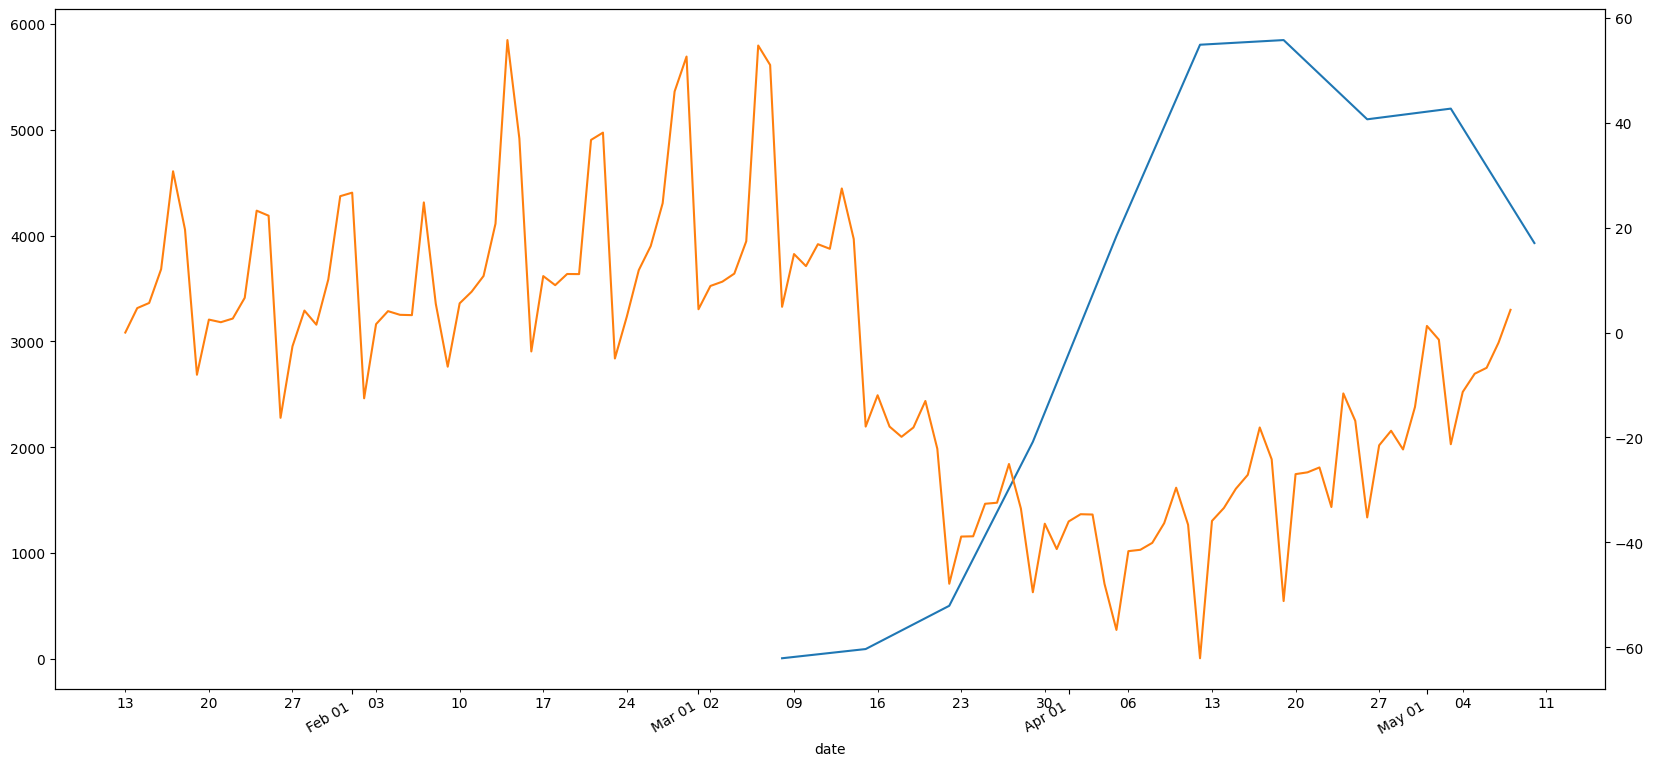

In [279]:
plt.figure()
ax = ga_p.plot(x_compat=True,figsize=(20,10))
for a in [ax]:
    a.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    a.xaxis.set_major_locator(mdates.DayLocator(1))
    a.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    a.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax2 = ga.plot(x_compat=True, secondary_y=True, figsize=(20,10))
    
plt.show()

#plt.grid(which='both')

#ax.xaxis.set_minor_locator(mdates.DayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator(1))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [234]:
!cal 2020
ga_positives.groupby(pd.Grouper(freq='W-MON')).sum()

                            2020
      January               February               March          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                     1   1  2  3  4  5  6  7  
 5  6  7  8  9 10 11   2  3  4  5  6  7  8   8  9 10 11 12 13 14  
12 13 14 15 16 17 18   9 10 11 12 13 14 15  15 16 17 18 19 20 21  
19 20 21 22 23 24 25  16 17 18 19 20 21 22  22 23 24 25 26 27 28  
26 27 28 29 30 31     23 24 25 26 27 28 29  29 30 31              
                                                                  

       April                  May                   June          
Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  Su Mo Tu We Th Fr Sa  
          1  2  3  4                  1  2      1  2  3  4  5  6  
 5  6  7  8  9 10 11   3  4  5  6  7  8  9   7  8  9 10 11 12 13  
12 13 14 15 16 17 18  10 11 12 13 14 15 16  14 15 16 17 18 19 20  
19 20 21 22 23 24 25  17 18 19 20 21 22 23  21 22 23 24 25 26 27  
26 27 28 29 30        24 25 

date
2020-03-09      10.0
2020-03-16     109.0
2020-03-23     651.0
2020-03-30    2037.0
2020-04-06    4505.0
2020-04-13    6001.0
2020-04-20    5632.0
2020-04-27    4966.0
2020-05-04    5455.0
2020-05-11    3164.0
Freq: W-MON, Name: positiveIncrease, dtype: float64

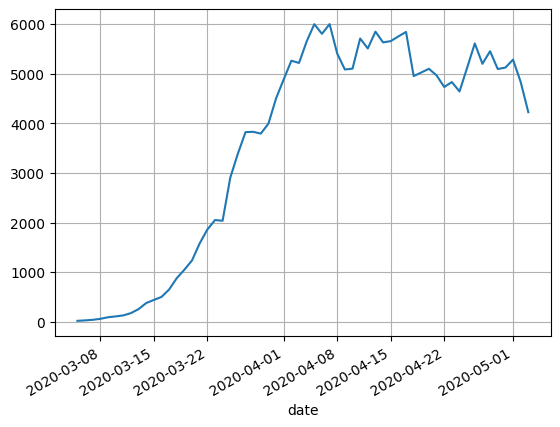

In [218]:
ax = ga_positives.rolling(7).sum().plot()
plt.grid(which='both')

In [217]:
ga_positives

date
2020-05-09    426.0
2020-05-08    667.0
2020-05-07    743.0
2020-05-06    985.0
2020-05-05    343.0
              ...  
2020-03-07      4.0
2020-03-06      0.0
2020-03-05      0.0
2020-03-04      NaN
2020-03-01      0.0
Name: positiveIncrease, Length: 68, dtype: float64

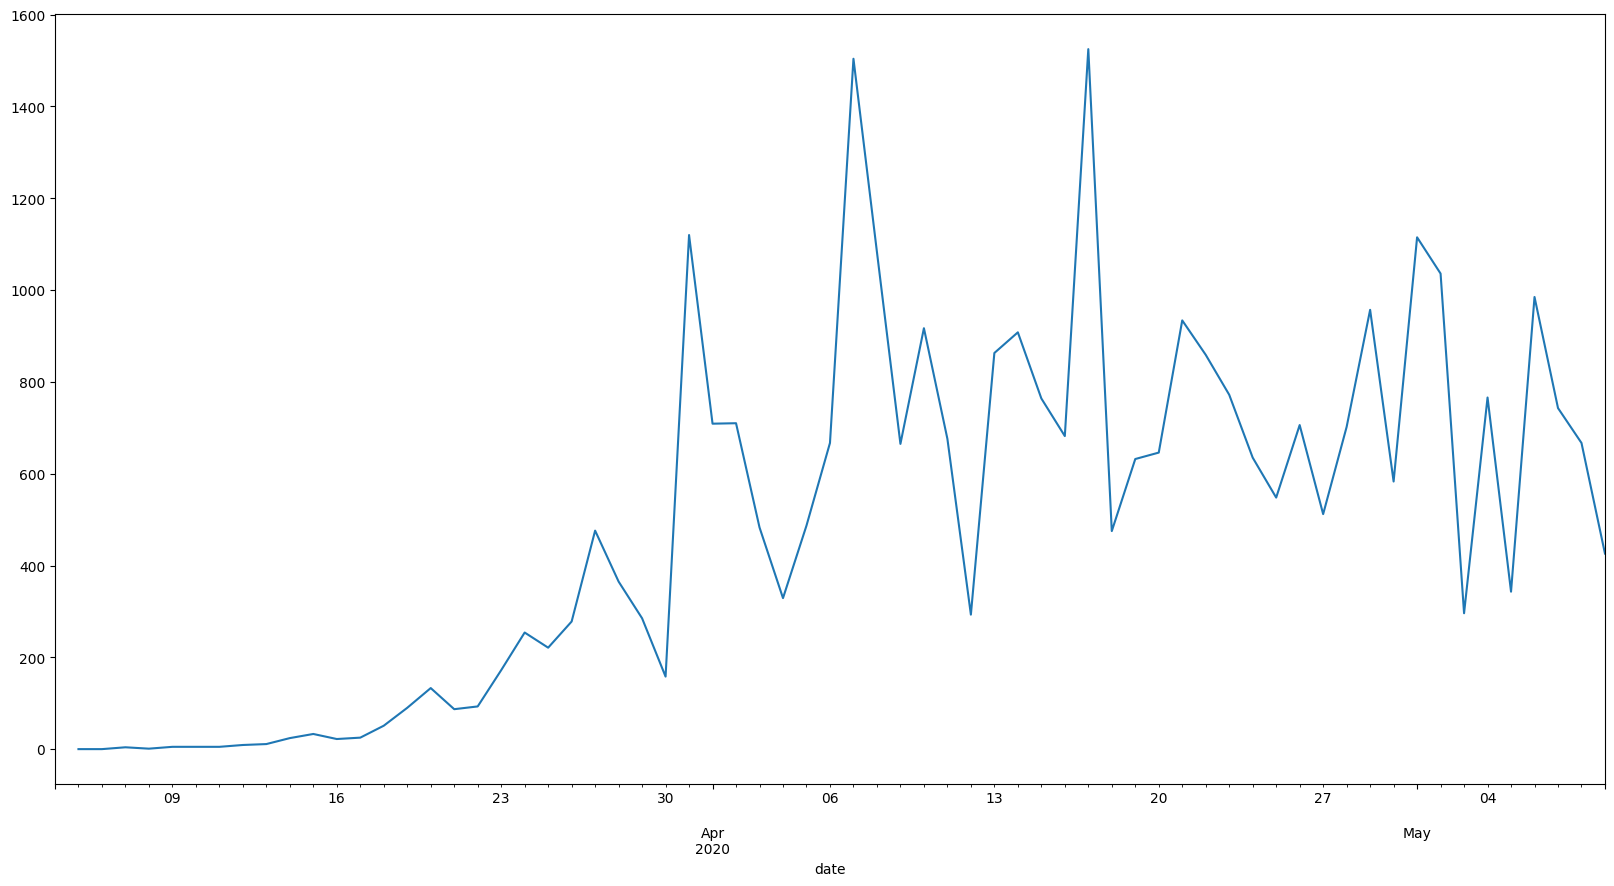

In [177]:
states[states['state'] == 'GA']['positiveIncrease'].plot(
    figsize=(20,10))

In [413]:
!ls ../covid-tracking-data/data
us = pd.read_csv("../covid-tracking-data/data/us_daily.csv", parse_dates = ['date'], index_col = 'date')[::-1]
us

counties.csv	    states_daily_4pm_et.csv  us_current.csv
states_current.csv  states_info.csv	     us_daily.csv


,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-24,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,56,1248137,6857376.0,3171.0,49130.0,135176.0,12137.0,5174.0,7070.0,529.0,...,135176.0,8108684,8105513,8105513,NaN,2746.0,3699.0,291140.0,27580.0,318720.0
2020-05-08,56,1275916,7132872.0,3307.0,47718.0,142037.0,11780.0,6294.0,6788.0,531.0,...,142037.0,8412095,8408788,8408788,NaN,1760.0,6861.0,275496.0,27779.0,303275.0
2020-05-09,56,1301095,7408535.0,3054.0,46637.0,147212.0,11496.0,6367.0,6551.0,543.0,...,147212.0,8712684,8709630,8709630,NaN,1529.0,5175.0,275663.0,25179.0,300842.0


In [420]:
us_weekly = us[['positiveIncrease', 'totalTestResultsIncrease']][:-1].groupby(pd.Grouper(freq='W-SUN')).sum()
us_weekly

,positiveIncrease,totalTestResultsIncrease
date,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,1.0,1.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,38.0,119.0
2020-03-08,681.0,4503.0
2020-03-15,4121.0,34324.0
2020-03-22,31492.0,210821.0


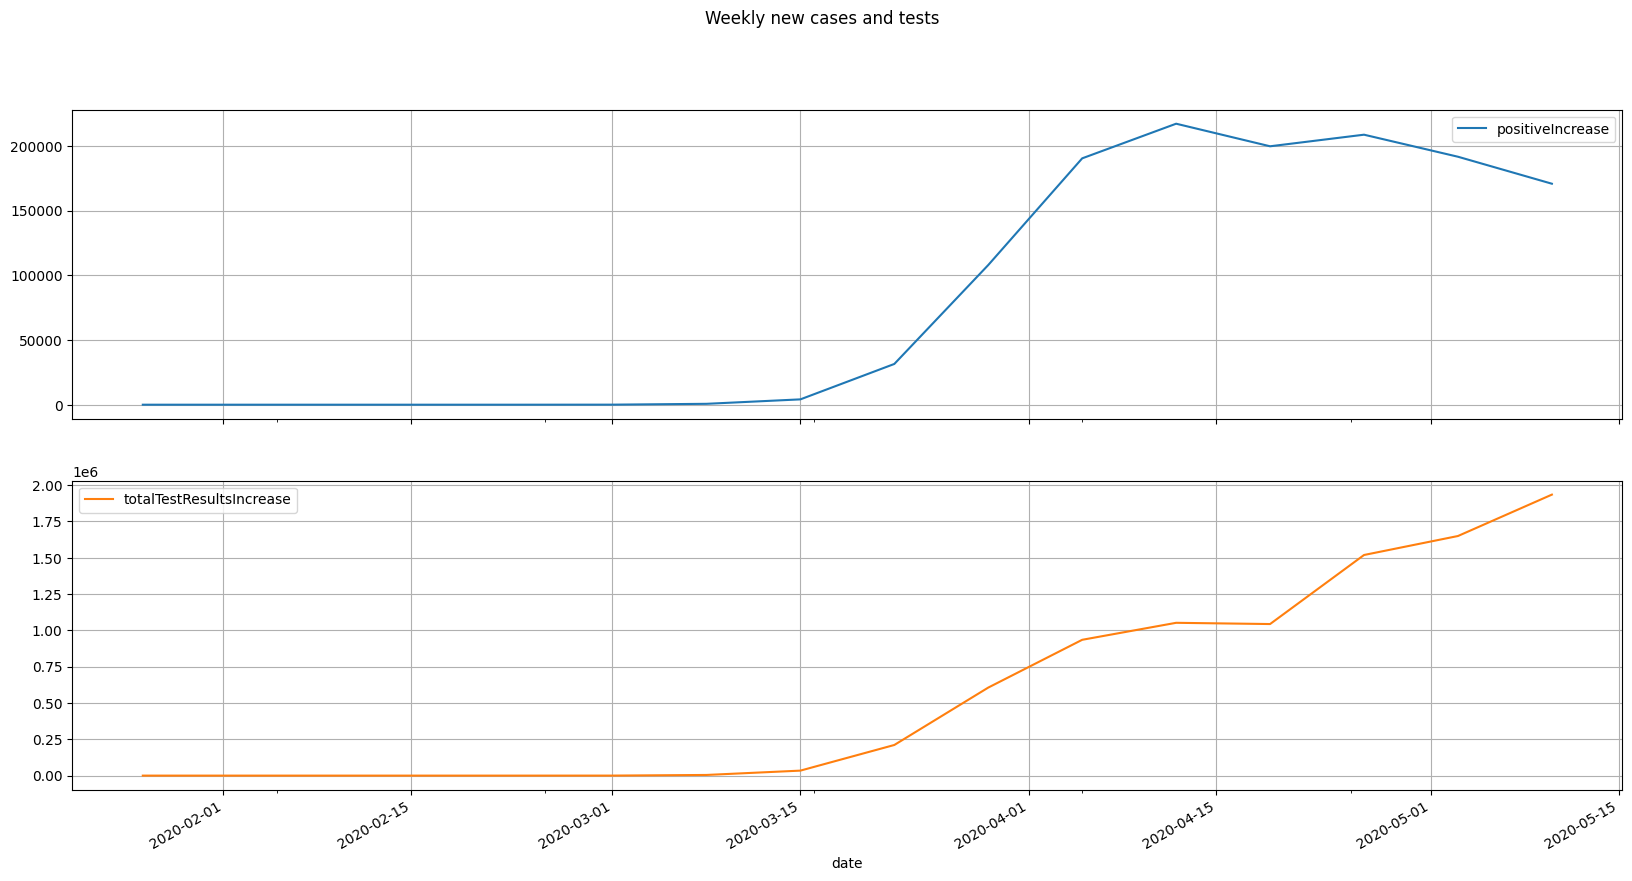

In [444]:
us_weekly.plot(
    grid=True,
    figsize=(20,10),
    x_compat=True,
    subplots=True,
    title="Weekly new cases and tests")

plt.savefig("lrt41.png")

In [439]:
weeks_back = 4
print(us_weekly[-weeks_back:])
per_day = us_weekly[-weeks_back:].mean()/7
per_day

            positiveIncrease  totalTestResultsIncrease
date                                                  
2020-04-19          199740.0                 1043264.0
2020-04-26          208697.0                 1518551.0
2020-05-03          191663.0                 1649229.0
2020-05-10          170801.0                 1934158.0


positiveIncrease             27532.178571
totalTestResultsIncrease    219471.500000
dtype: float64

In [442]:
print(us['positive'][pd.to_datetime('2020-05-10')])
per_day * 7 + us['positive'][pd.to_datetime('2020-05-10')]

1322807


positiveIncrease            1515532.25
totalTestResultsIncrease    2859107.50
dtype: float64

In [432]:
1322807+192725

1515532

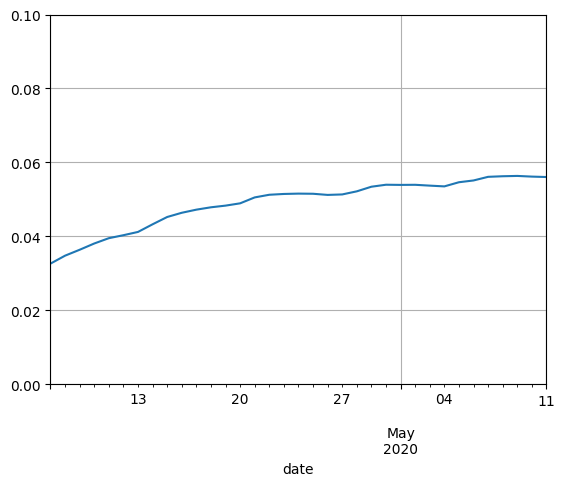

In [549]:
(us['death']/us['positive'])[-35:].plot(ylim=(0,0.1), grid=True)

In [539]:
(us['death']/us['positive'])[-35:]

date
2020-04-07    0.032602
2020-04-08    0.034753
2020-04-09    0.036353
2020-04-10    0.038046
2020-04-11    0.039485
2020-04-12    0.040291
2020-04-13    0.041177
2020-04-14    0.043242
2020-04-15    0.045218
2020-04-16    0.046360
2020-04-17    0.047203
2020-04-18    0.047844
2020-04-19    0.048294
2020-04-20    0.048915
2020-04-21    0.050517
2020-04-22    0.051234
2020-04-23    0.051452
2020-04-24    0.051544
2020-04-25    0.051504
2020-04-26    0.051194
2020-04-27    0.051322
2020-04-28    0.052162
2020-04-29    0.053411
2020-04-30    0.053948
2020-05-01    0.053902
2020-05-02    0.053930
2020-05-03    0.053705
2020-05-04    0.053500
2020-05-05    0.054623
2020-05-06    0.055103
2020-05-07    0.056085
2020-05-08    0.056244
2020-05-09    0.056330
2020-05-10    0.056146
2020-05-11    0.056033
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bcc519438>,
      dtype=object)

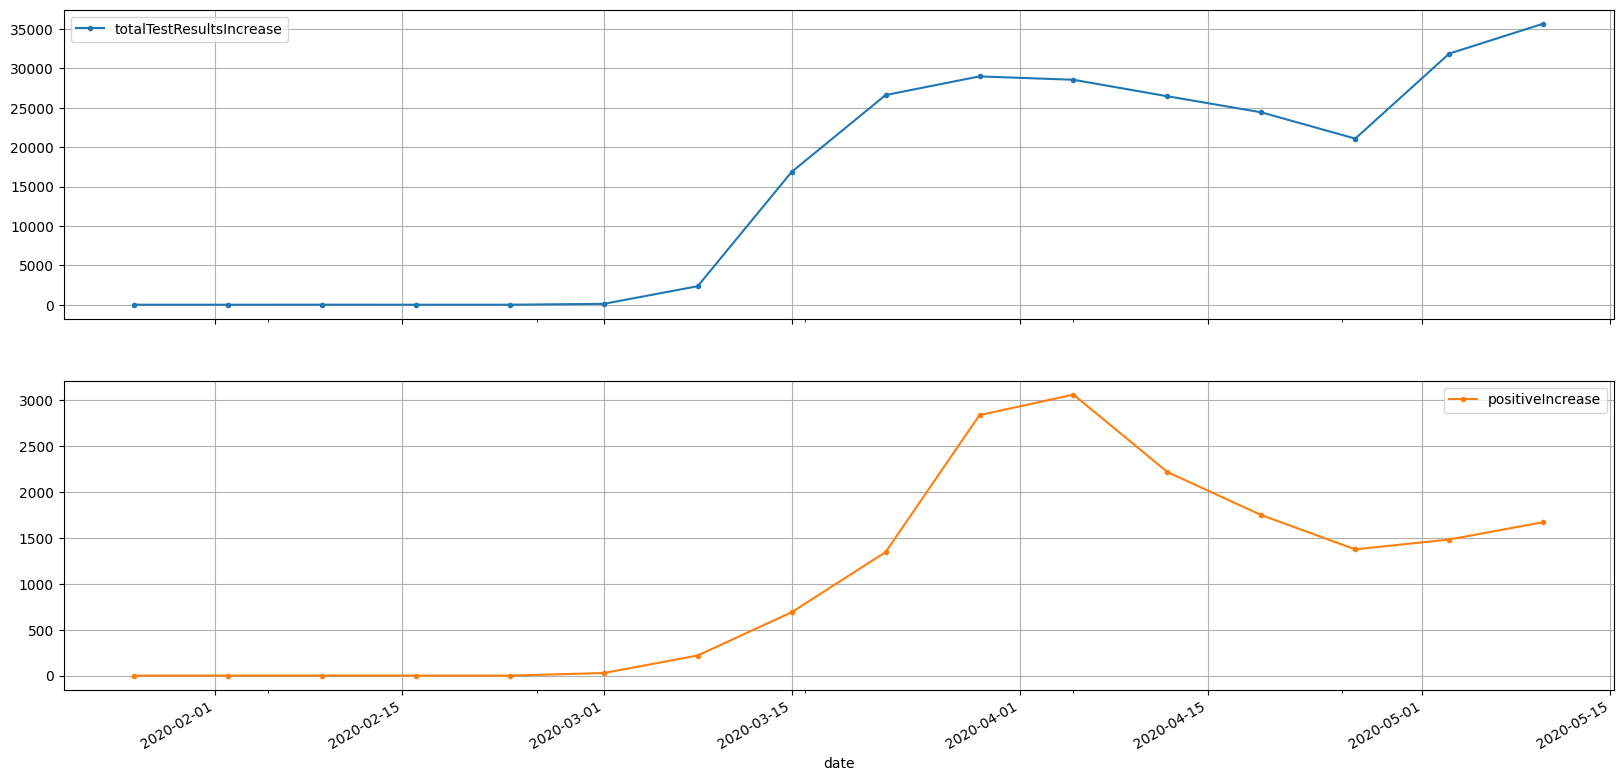

In [572]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[:-1].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc78f52b0>,
      dtype=object)

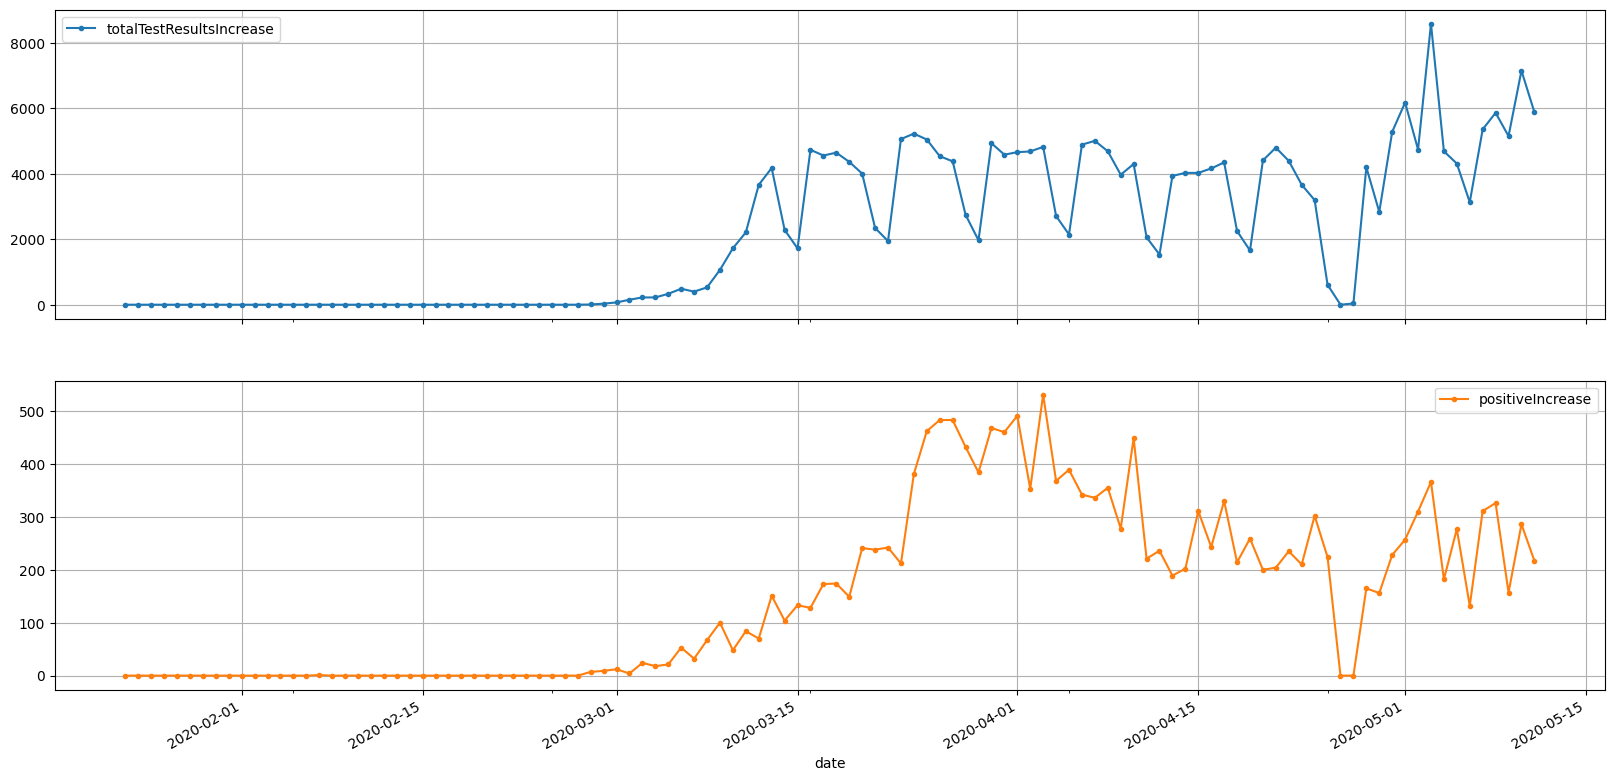

In [570]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'])

In [580]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()[-2:-1].mean()/7

totalTestResultsIncrease    5096.285714
positiveIncrease             238.714286
dtype: float64

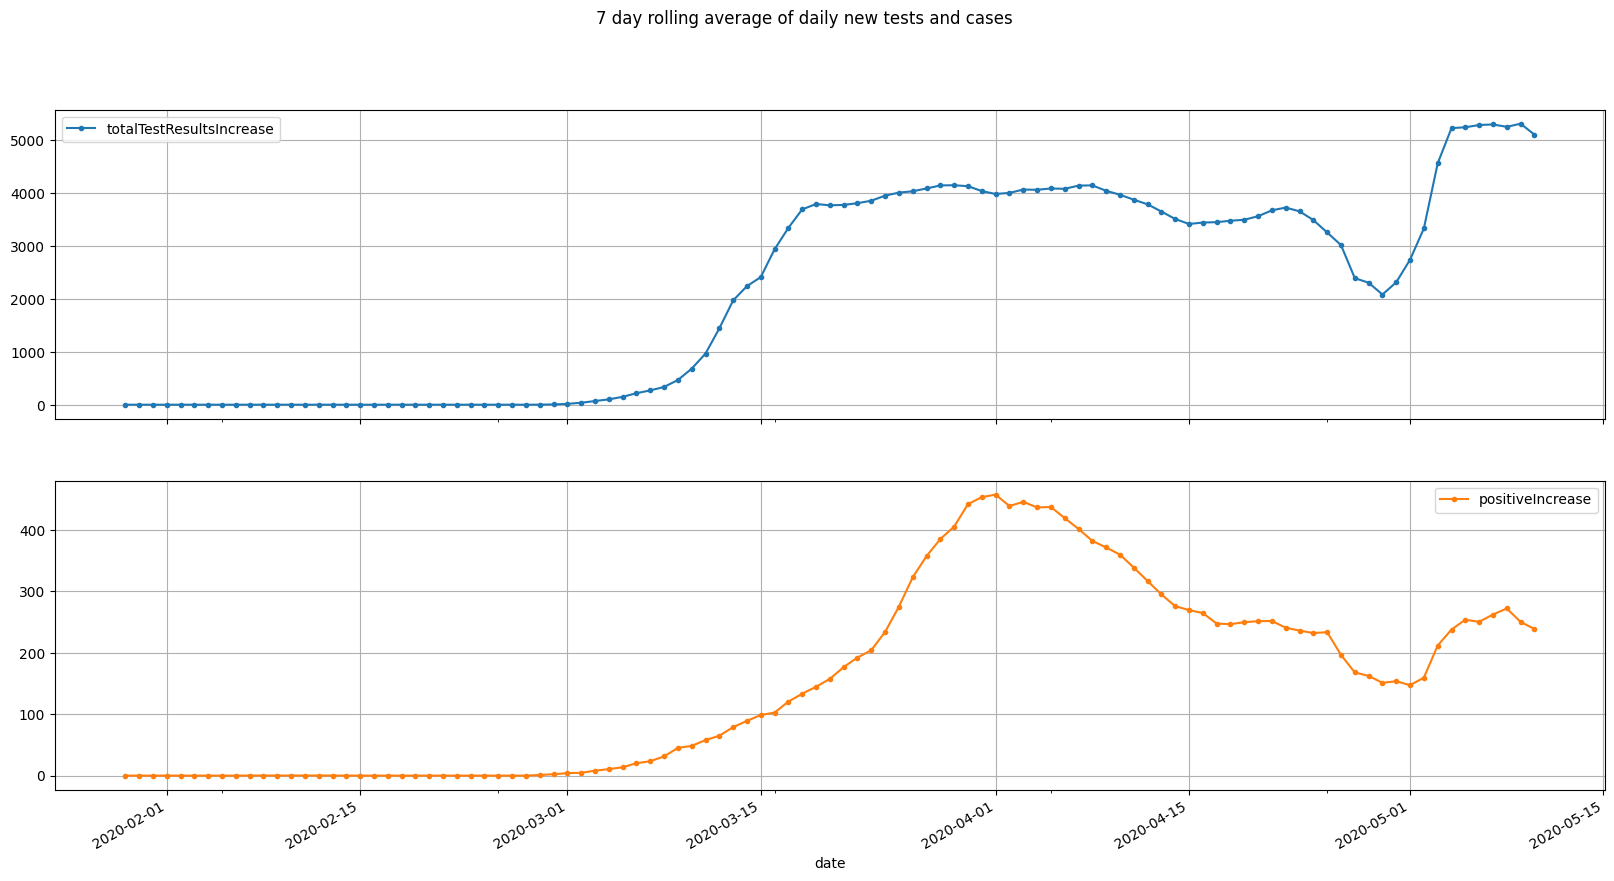

In [584]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].rolling(7).mean()[:-1].plot(
grid=True,
figsize=(20,10),
subplots=True,
x_compat=True,
style=['.-','.-'],
title="7 day rolling average of daily new tests and cases")

plt.savefig('lrt43_daily_wa_rolling_average.png')

In [563]:
states[states['state'] == 'WA'][['totalTestResultsIncrease','positiveIncrease']].groupby(pd.Grouper(freq='W-SUN')).sum()

,totalTestResultsIncrease,positiveIncrease
date,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,1.0,1.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,109.0,28.0
2020-03-08,2346.0,219.0
2020-03-15,16854.0,690.0
2020-03-22,26613.0,1345.0
